# Clustering Countries by Socio-Economic and Health Indicators

The country dataset includes socio-economic and health indicators such as child mortality, exports, health expenditure, income, inflation, life expectancy, fertility rates, and GDP per capita. The objective is to categorize the countries into three clusters: Developed, Developing, and Least Developed.

To achieve this, we will employ an unsupervised learning approach, specifically clustering algorithms. This method will help identify patterns and group countries based on similar socio-economic and health profiles. By analyzing these clusters, we can gain insights into the factors that differentiate countries at various stages of development, enabling targeted policy interventions and resource allocation.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Number of unique countries
df['country'].nunique()

167

In [2]:
X = df.drop(columns='country')
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: >

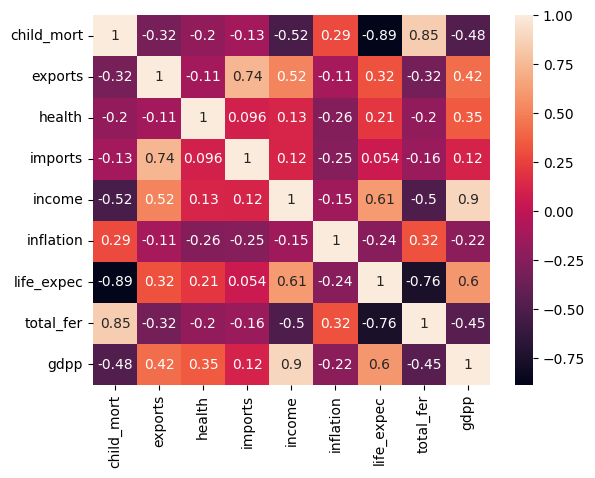

In [ ]:
import seaborn as sns

sns.heatmap(X.corr(), annot=True)

From the above Correlation Matrix, we can infer that:

- **GDP per Capita (gdpp)** and **Income** are highly positively correlated (0.90).
- **Child Mortality (child_mort)** and **Total Fertility Rate (total_fer)** are highly positively correlated (0.85).
- **Imports** and **Exports** are also highly positively correlated (0.74).
- **Life Expectancy (life_expec)** is strongly negatively correlated with both **Child Mortality** (-0.89) and **Total Fertility Rate** (-0.76).

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Determining the Optimal Number of Clusters

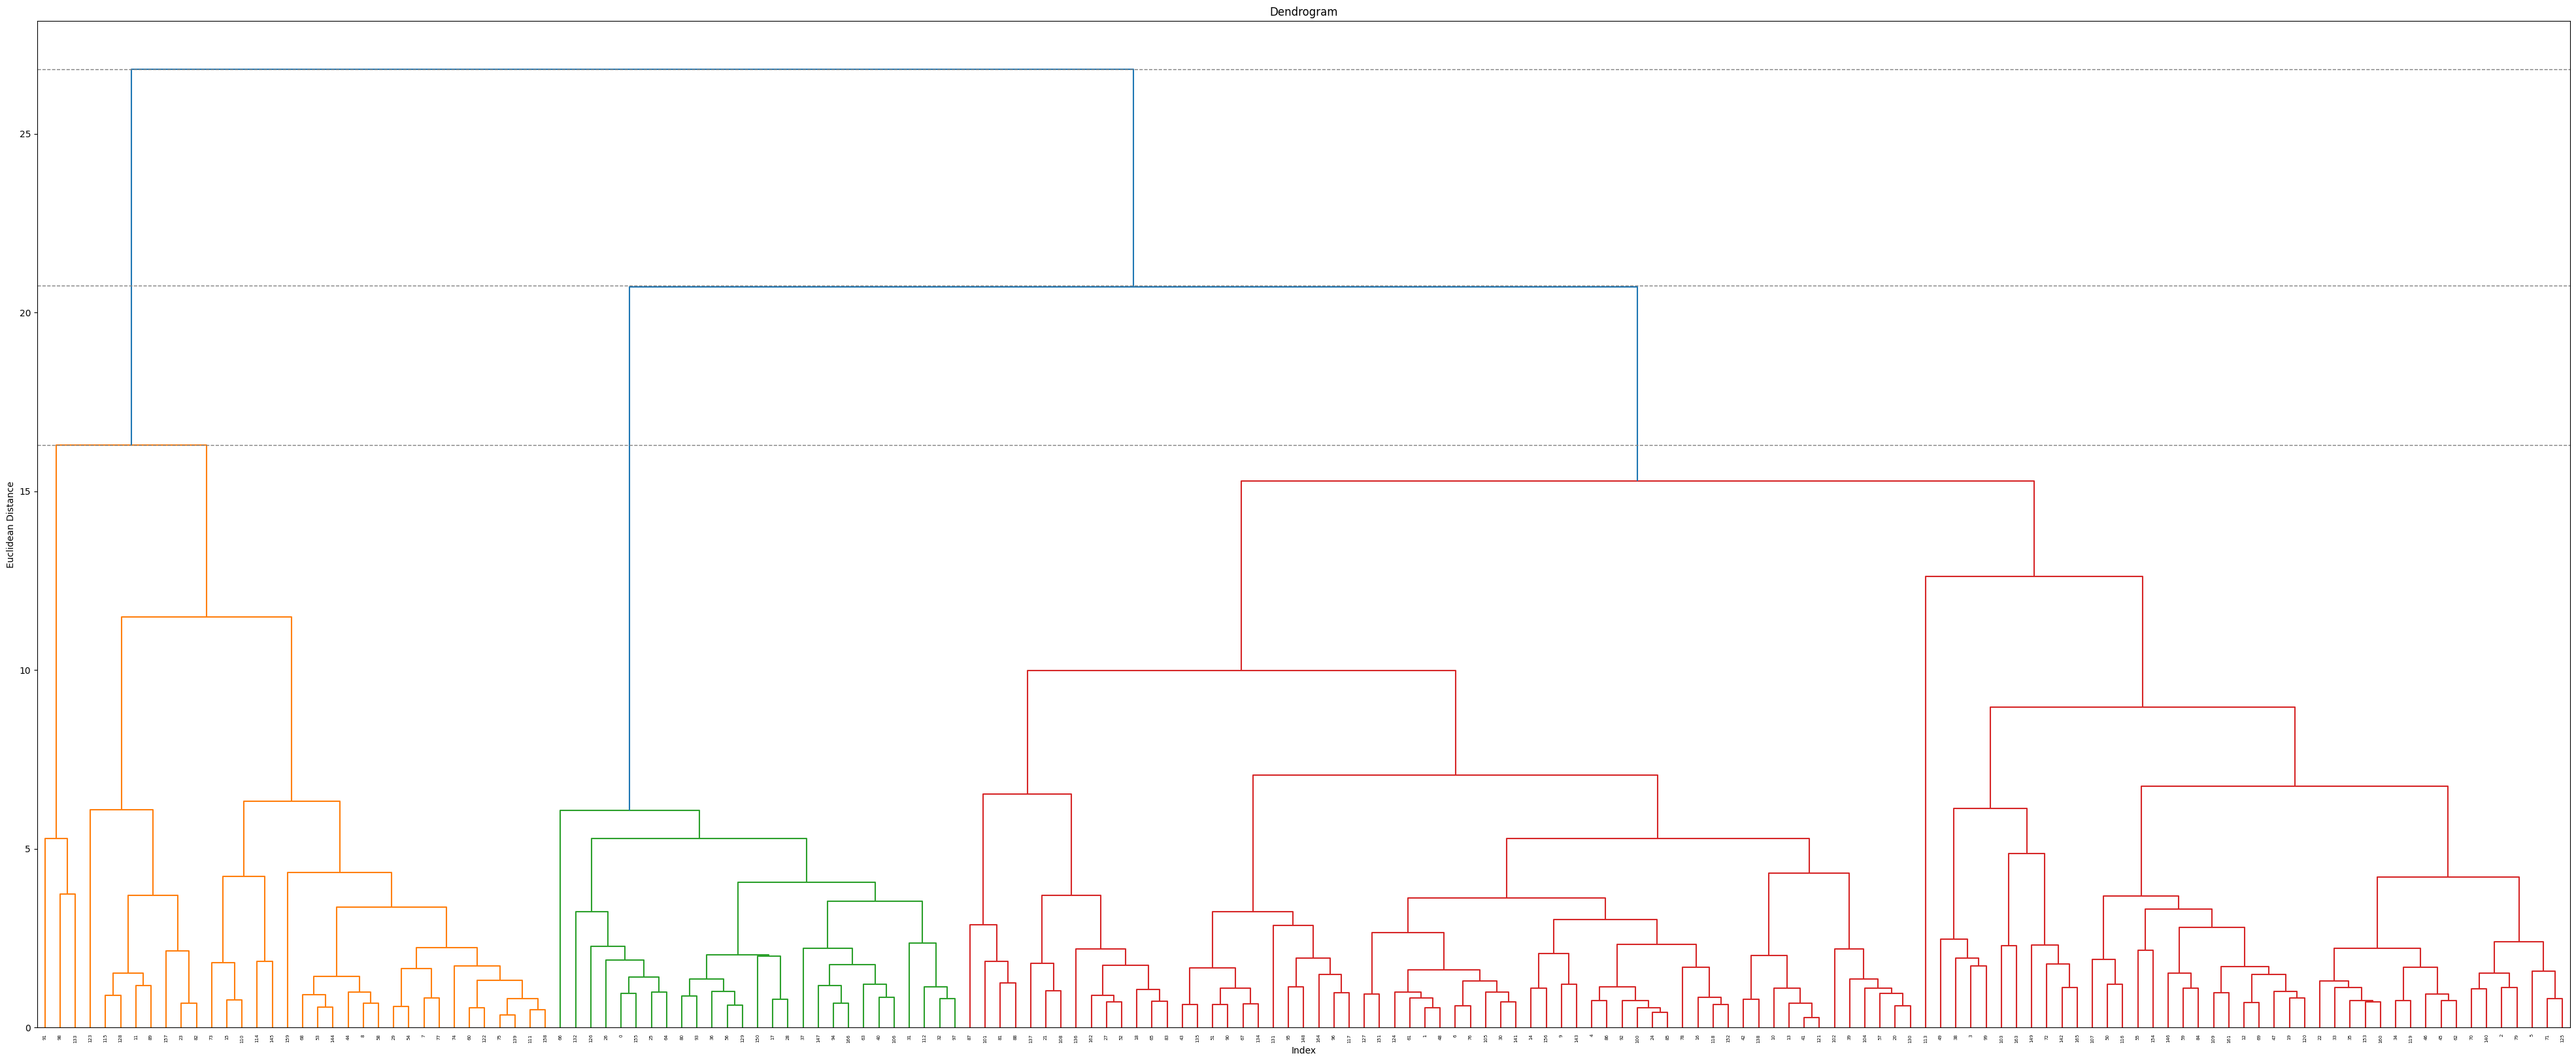

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Plot dendrogram
plt.figure(figsize=(50, 20))

linkage = hierarchy.linkage(X_scaled, method='ward')
dendrogram = hierarchy.dendrogram(linkage)

plt.axhline(y=16.29, c='grey', linestyle='dashed', linewidth=1)
plt.axhline(y=20.75, c='grey', linestyle='dashed', linewidth=1)
plt.axhline(y=26.81, c='grey', linestyle='dashed', linewidth=1)

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

From the dendrogram above, the largest vertical distance that doesn’t intersect any other clusters is between the Y-coordinates 20.75 and 26.81. Drawing a horizontal line at both extremities shows that the number of vertical lines crossing this line is 2.

Similarly, the number of vertical lines crossing the horizontal line at the Y-coordinates 16.29 and 20.75 is 3.

Based on the largest vertical distance, it suggests 2 clusters. However, the optimal number of clusters could be either 2 or 3, depending on further analysis.

***Silhouette Score*** and ***Elbow Method***

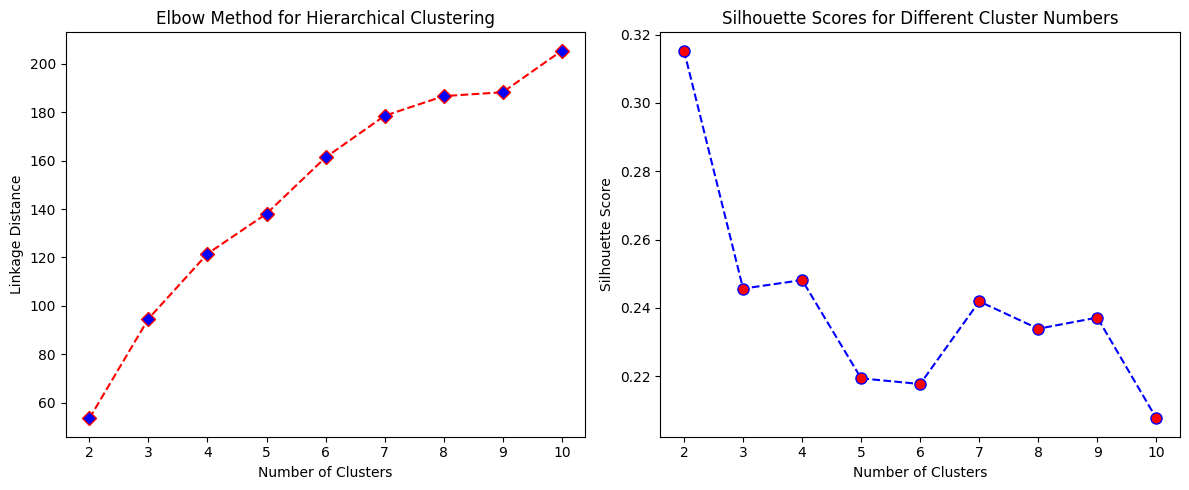

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Initialize lists to store the scores and distances
sil_scores = []
distances = []

n_clusters = range(2, 11)    # Different numbers of clusters from 2 to 11

# Perform clustering and calculate both silhouette scores and linkage distances
for n in n_clusters:
    model = AgglomerativeClustering(n_clusters=n)
    cluster_labels = model.fit_predict(X_scaled)

    # Compute silhouette score for each cluster configuration
    sil_score = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(sil_score)

    # Get the total distance for the current number of clusters (using the linkage matrix)
    cluster_labels = hierarchy.fcluster(linkage, t=n, criterion='maxclust')
    distance = sum([link[2] for link in linkage if link[3] <= n])  # Approximate sum of distances
    distances.append(distance)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the linkage distance (Elbow method)
axes[0].plot(n_clusters, distances, color='red', linestyle='dashed', marker='D', markerfacecolor='blue', markersize=7)
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Linkage Distance')
axes[0].set_title('Elbow Method for Hierarchical Clustering')

# Plotting the silhouette scores
axes[1].plot(n_clusters, sil_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Scores for Different Cluster Numbers')

plt.tight_layout()
plt.show()

**Elbow Method:**

- The Elbow Method graphs the linkage distance (dissimilarity between clusters) against the number of clusters. The optimal number of clusters is typically found where there is an "elbow" or sharp bend in the plot, indicating a point where the rate of decrease slows significantly.
- In this case, the elbow occurs at **3 clusters**, where adding more clusters leads to smaller reductions in the linkage distance.

**Silhouette Score:**

- The Silhouette Score measures how similar a data point is to its own cluster compared to others, with higher scores indicating better-defined clusters.
- The highest Silhouette Score is observed at **2 clusters**.

**Conclusion:**

Considering both the **Elbow Method** and the **Silhouette Score**, **3 clusters** is the most suitable choice, as it balances cluster separation with a reasonable level of cluster quality.


In [32]:
from sklearn.cluster import AgglomerativeClustering

# Get labels from Agglomearative Hierarchical clustering
hclustering = AgglomerativeClustering(n_clusters=3)
hclustering.fit_predict(X_scaled)
cluster_label = hclustering.labels_

In [33]:
# Add hcluster labels to df
df['Cluster'] = cluster_label
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [34]:
df['Cluster'].unique()

array([2, 1, 0])

From the above Correlation Matrix, we can infer that:

- **GDP per Capita (gdpp)** and **Income** are highly positively correlated (0.90).
- **Child Mortality (child_mort)** and **Total Fertility Rate (total_fer)** are highly positively correlated (0.85).
- **Imports** and **Exports** are also highly positively correlated (0.74).
- **Life Expectancy (life_expec)** is highly negatively correlated with both **Child Mortality** (-0.89) and **Total Fertility Rate** (-0.76).

---

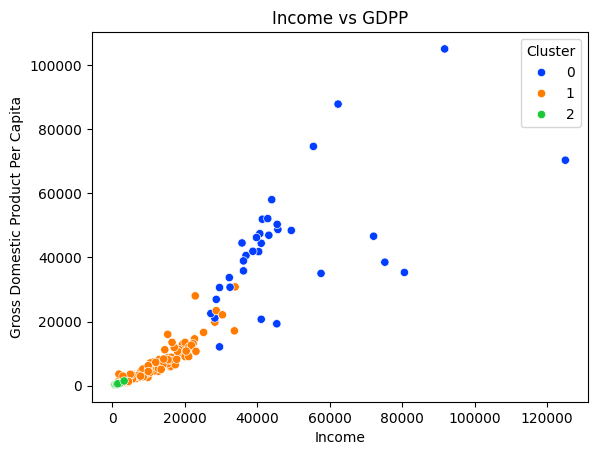

In [35]:
import seaborn as sns

# Visulizing hcluster
sns.scatterplot(x='income', y='gdpp', hue='Cluster', data=df, palette='bright')
plt.title("Income vs GDPP")
plt.xlabel("Income")
plt.ylabel("Gross Domestic Product Per Capita")
plt.show()

## Income vs GDPP Insights:

- **Cluster 0 (Blue)** represents countries with **high income and high GDPP**, typically indicating **Developed Countries**.
- **Cluster 1 (Orange)** consists of countries with **moderate income and GDPP**, which suggests they are **Developing Countries**.
- **Cluster 2 (Green)** includes countries with **low income and GDPP**, representing **Least Developed Countries**.
- This plot clearly distinguishes between the clusters based on economic strength.

---

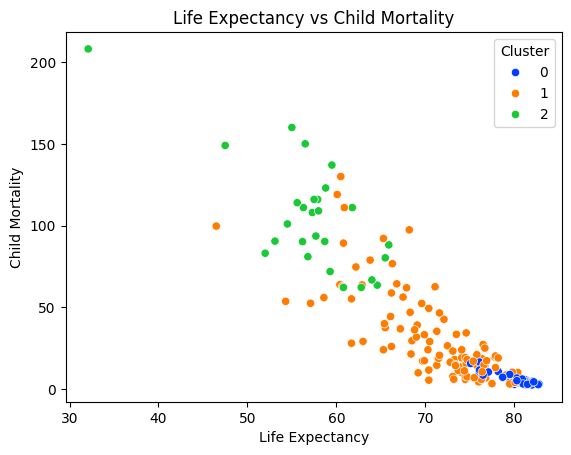

In [36]:
sns.scatterplot(x='life_expec', y='child_mort', hue='Cluster', data=df, palette='bright')
plt.title("Life Expectancy vs Child Mortality")
plt.xlabel("Life Expectancy")
plt.ylabel("Child Mortality")
plt.show()

## Life Expectancy vs Child Mortality Insights:

- **Cluster 0 (Blue)** shows countries with **high life expectancy** and **low child mortality**, characteristics of **Developed Countries**.
- **Cluster 1 (Orange)** has **moderate life expectancy** and **moderate child mortality**, indicative of **Developing Countries**.
- **Cluster 2 (Green)** represents countries with **low life expectancy** and **high child mortality**, reflecting **Least Developed Countries**.
- This graph is useful for analyzing **health outcomes** across different clusters.

---

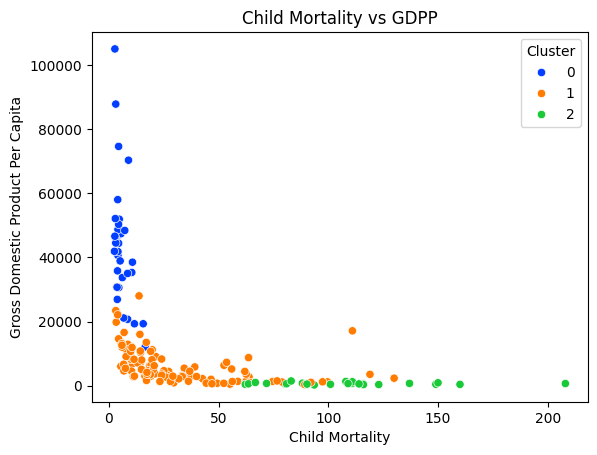

In [37]:
sns.scatterplot(x='child_mort', y='gdpp', hue='Cluster', data=df, palette='bright')
plt.title("Child Mortality vs GDPP")
plt.xlabel("Child Mortality")
plt.ylabel("Gross Domestic Product Per Capita")
plt.show()

## Child Mortality vs GDPP Insights:

- **Cluster 0 (Blue)**: Low child mortality and high GDPP, confirming they are **Developed Countries**.
- **Cluster 1 (Orange)**: Moderate child mortality and moderate GDPP, representing **Developing Countries**.
- **Cluster 2 (Green)**: High child mortality and low GDPP, which are **Least Developed Countries**.
- This graph reinforces the correlation between **economic prosperity** and **health outcomes**.

---

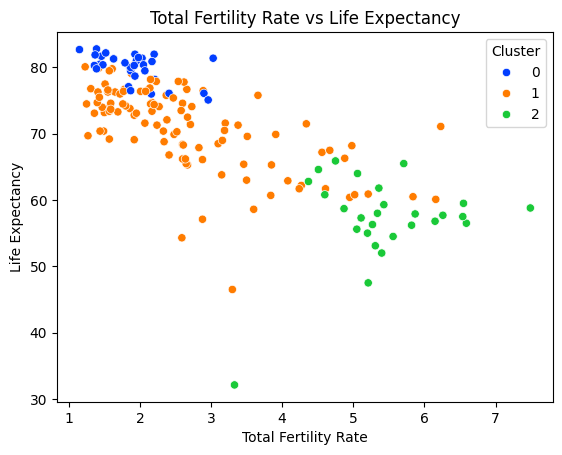

In [38]:
sns.scatterplot(x='total_fer', y='life_expec', hue='Cluster', data=df, palette='bright')
plt.title("Total Fertility Rate vs Life Expectancy")
plt.xlabel("Total Fertility Rate")
plt.ylabel("Life Expectancy")
plt.show()

## Total Fertility Rate vs Life Expectancy Insights:

- **Cluster 0 (Blue)** has **low fertility rates** and **high life expectancy**, typical of **Developed Countries**.
- **Cluster 1 (Orange)** shows **moderate fertility rates** and **moderate life expectancy**, representing **Developing Countries**.
- **Cluster 2 (Green)** has **high fertility rates** and **low life expectancy**, which indicates **Least Developed Countries**.
- This plot provides further insight into the **demographic and health development** of countries.

---

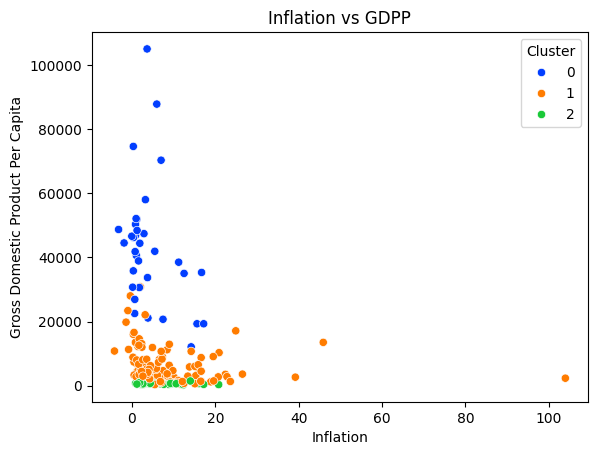

In [39]:
sns.scatterplot(x='inflation', y='gdpp', hue='Cluster', data=df, palette='bright')
plt.title("Inflation vs GDPP")
plt.xlabel("Inflation")
plt.ylabel("Gross Domestic Product Per Capita")
plt.show()

## Inflation vs GDPP Insights:

- **Cluster 0 (Blue)**: Countries with **low inflation** and **high GDPP**, aligning with **Developed Countries**.
- **Cluster 1 (Orange)**: Countries with **moderate inflation** and **moderate GDPP**, indicating **Developing Countries**.
- **Cluster 2 (Green)**: Countries with **moderate to high inflation** and **low GDPP**, suggesting **Least Developed Countries**.
- This graph provides insights into **macroeconomic stability** and its relation to development.

---

## Final Cluster Labeling

Based on the analysis from the various graphs, we can confidently categorize the clusters as follows:

- **Cluster 0 (Blue): Developed Countries**
  - These countries exhibit **high income**, **high GDPP**, **low child mortality**, **high life expectancy**, and **low inflation**.
  - The economic strength and better health outcomes in this cluster indicate that these are **Developed Countries**.
  
- **Cluster 1 (Orange): Developing Countries**
  - Countries in this cluster have **moderate income**, **moderate GDPP**, **moderate child mortality**, **moderate life expectancy**, and **moderate inflation**.
  - They are progressing towards economic and health improvements, making them **Developing Countries**.
  
- **Cluster 2 (Green): Least Developed Countries**
  - This cluster is characterized by **low income**, **low GDPP**, **high child mortality**, **low life expectancy**, and **high fertility rates**.
  - The indicators of poor economic and health conditions suggest that these are **Least Developed Countries**.

### Conclusion:
Based on the hierarchical clustering and the patterns observed in the visualizations, we have labeled the clusters as follows:
- **Cluster 0**: Developed Countries
- **Cluster 1**: Developing Countries
- **Cluster 2**: Least Developed Countries

In [40]:
df['Cluster'] = df['Cluster'].replace({
    0: 'Developed Countries',
    1: 'Developing Countries',
    2: 'Least Developed Countries'
})

In [41]:
df['Cluster'].value_counts()

,count
Cluster,
Developing Countries,106
Developed Countries,34
Least Developed Countries,27


In [42]:
developed_countries = df[df['Cluster']=='Developed Countries']
developed_countries['country']

,country
7,Australia
8,Austria
11,Bahrain
15,Belgium
23,Brunei
29,Canada
44,Denmark
53,Finland
54,France
58,Germany


In [43]:
developing_countries = df[df['Cluster']=='Developing Countries']
developing_countries['country']

,country
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
5,Argentina
...,...
161,Uzbekistan
162,Vanuatu
163,Venezuela
164,Vietnam


In [44]:
developing_countries[developing_countries['country'] == 'India']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350,Developing Countries


In [45]:
least_developed_countries = df[df['Cluster']=='Least Developed Countries']
least_developed_countries['country']

,country
0,Afghanistan
17,Benin
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros
37,"Congo, Dem. Rep."
40,Cote d'Ivoire
